<a href="https://colab.research.google.com/github/zdlundy/DAT_512_Unit_2_Project/blob/main/Link_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zachary Lundy 
## Unit Project 2

Project Requirements

Perform an analysis of the fictitious e-commerce dataset bigquery-public-data.thelook_ecommerce. This analysis will include an analysis of products, users, and products, and users and will address the following:

Evaluation of products, analyzing product sales, and product web views, and a justified recommendation on cutting 20% of products from the store, listing the products to remove.

Examination of users, users' data, purchase and returns behavior, and web behavior. Delivering a categorization of users into meaningful segments with an explanation of how that categorization could be used by the business. Each user will need to be assigned a category.

In [2]:
# authenticate with the google account used in console
from google.colab import auth
auth.authenticate_user()

##Load in product information for analysis

In [3]:
import pandas as pd

project_id = 'long-adviser-380023'

sql='''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.products`
'''

products = pd.io.gbq.read_gbq(sql,project_id=project_id)

[Text(0.5, 1.0, 'Count of Items Listed by Category'),
 Text(0, 0.5, 'Categories'),
 Text(0.5, 0, 'Count of Itmes in Categories')]

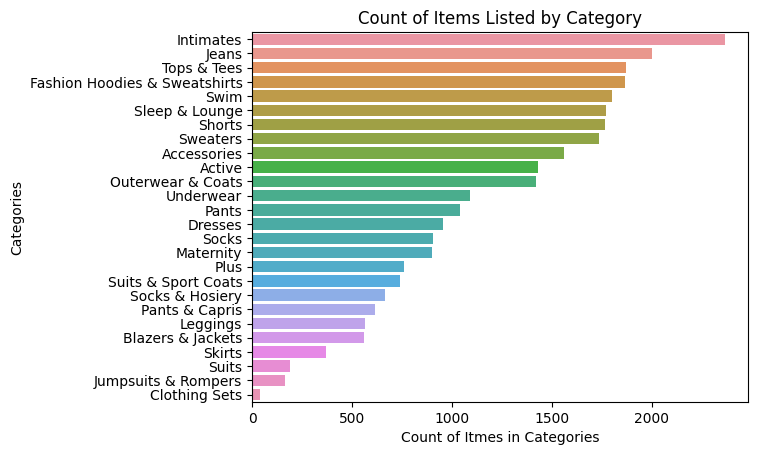

In [20]:
import seaborn as sns
sns.countplot(data=products, y='category', order=products.category.value_counts().index).set(
    title='Count of Items Listed by Category', ylabel="Categories", xlabel="Count of Itmes in Categories")

The highest retail item is: Alpha Industries Rip Stop Short

In [6]:
max_price=products.loc[products['retail_price'].idxmax()]
print(max_price)

id                                                   23546
cost                                            482.516999
category                                            Shorts
name                       Alpha Industries Rip Stop Short
brand                                     Alpha Industries
retail_price                                         999.0
department                                             Men
sku                       C1AA157F9E8516370E3345F226EF62FC
distribution_center_id                                   5
Name: 5182, dtype: object


The lowest retail item is: Indestructable Aluminum Aluma Wallet - RED

In [7]:
min_price=products.loc[products['retail_price'].idxmin()]
print(min_price)

id                                                             14235
cost                                                          0.0083
category                                                 Accessories
name                      Indestructable Aluminum Aluma Wallet - RED
brand                                                        marshal
retail_price                                                    0.02
department                                                     Women
sku                                 8425BC94A44E3D1BB3C8C026B2702C00
distribution_center_id                                             1
Name: 23267, dtype: object


The most costly good to make: Nike Jordan Retro 11 Bred Bootie Socks

In [8]:
max_cost=products.loc[products['cost'].idxmax()]
print(max_cost)

id                                                         24899
cost                                                  557.151002
category                                                   Socks
name                      Nike Jordan Retro 11 Bred Bootie Socks
brand                                                     Jordan
retail_price                                               903.0
department                                                   Men
sku                             5D147304859C2C8752CF5DEDB4B50D49
distribution_center_id                                        10
Name: 3942, dtype: object


The cheapest good to make: Indestructable Aluminum Aluma Wallet - RED

In [9]:
min_cost=products.loc[products['cost'].idxmin()]
print(min_cost)

id                                                             14235
cost                                                          0.0083
category                                                 Accessories
name                      Indestructable Aluminum Aluma Wallet - RED
brand                                                        marshal
retail_price                                                    0.02
department                                                     Women
sku                                 8425BC94A44E3D1BB3C8C026B2702C00
distribution_center_id                                             1
Name: 23267, dtype: object


Calculate the profit margin per product

In [10]:
products["margin"] = products["retail_price"] - products["cost"]

Highest profit item (first in list): Darla (coat)

In [12]:
max_margin=products.loc[products['margin'].idxmax()]
print(max_margin)

id                                                   24447
cost                                            404.595001
category                                 Outerwear & Coats
name                                                 Darla
brand                                     Alpha Industries
retail_price                                         999.0
department                                             Men
sku                       1CE5E897CDA6AEB211DFFE8D514F4365
distribution_center_id                                   5
margin                                          594.404999
Name: 11058, dtype: object


Lowest product margin: Indestructable Aluminum Aluma Wallet - RED3

In [13]:
min_margin=products.loc[products['margin'].idxmin()]
print(min_margin)

id                                                             14235
cost                                                          0.0083
category                                                 Accessories
name                      Indestructable Aluminum Aluma Wallet - RED
brand                                                        marshal
retail_price                                                    0.02
department                                                     Women
sku                                 8425BC94A44E3D1BB3C8C026B2702C00
distribution_center_id                                             1
margin                                                        0.0117
Name: 23267, dtype: object


##Import the ordered product data for analysis

In [14]:
import pandas as pd

project_id = 'long-adviser-380023'

sql='''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.order_items` oi
LEFT JOIN `bigquery-public-data.thelook_ecommerce.products` p ON
oi.product_id=p.id 
'''

order_prod = pd.io.gbq.read_gbq(sql,project_id=project_id)

[Text(0.5, 1.0, 'Count of Items Sold'),
 Text(0, 0.5, 'Categories'),
 Text(0.5, 0, 'Count of Categories Sold')]

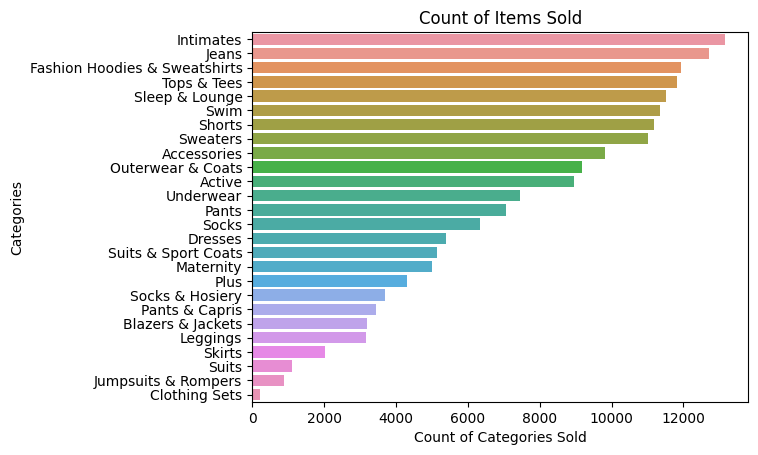

In [19]:
import seaborn as sns
sns.countplot(data=order_prod, y='category', order=order_prod.category.value_counts().index).set(
    title='Count of Items Sold by Category', ylabel="Categories", xlabel="Count of Categories Sold")

[Text(0.5, 1.0, 'Count of Items Sold by Category'),
 Text(0, 0.5, 'Categories'),
 Text(0.5, 0, 'Count of Categories Sold')]

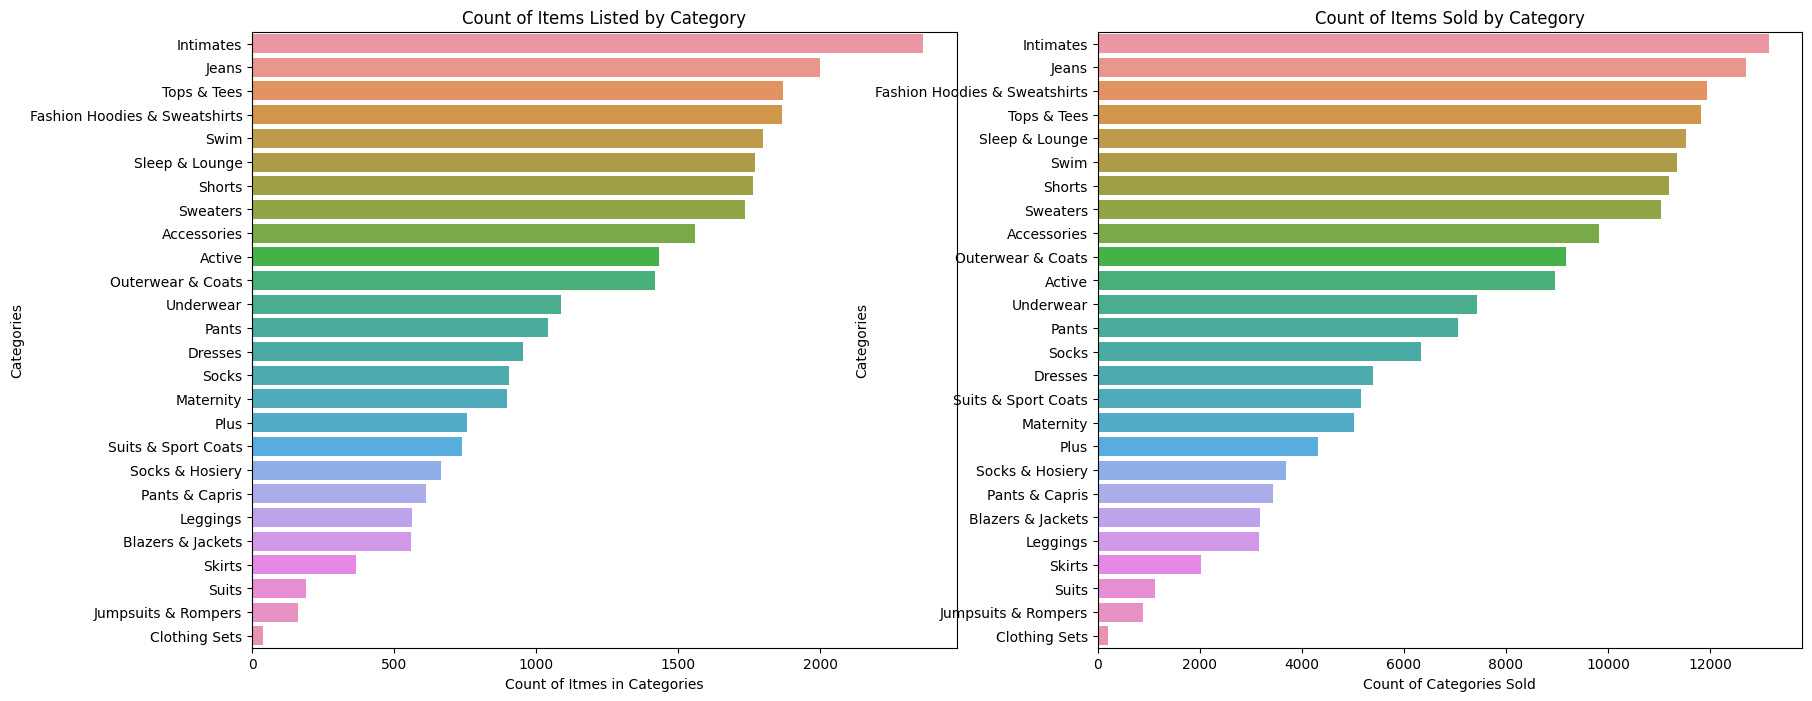

In [27]:
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
sns.countplot(data=products, y='category', order=products.category.value_counts().index, ax=ax1).set(
    title='Count of Items Listed by Category', ylabel="Categories", xlabel="Count of Itmes in Categories")
sns.countplot(data=order_prod, y='category', order=order_prod.category.value_counts().index, ax=ax2).set(
    title='Count of Items Sold by Category', ylabel="Categories", xlabel="Count of Categories Sold")

##Evaluate the web data 


In [30]:
import pandas as pd

project_id = 'long-adviser-380023'

sql='''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.events` where event_type in ('product')
'''

views = pd.io.gbq.read_gbq(sql,project_id=project_id)

In [32]:
import re
views["product_id"] = views['uri'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [49]:
views_merge = pd.merge(views, products, how="left", left_on="product_id", right_on="id")


[Text(0.5, 1.0, 'Count of Product Category Views'),
 Text(0, 0.5, 'Categories'),
 Text(0.5, 0, 'Count of Views')]

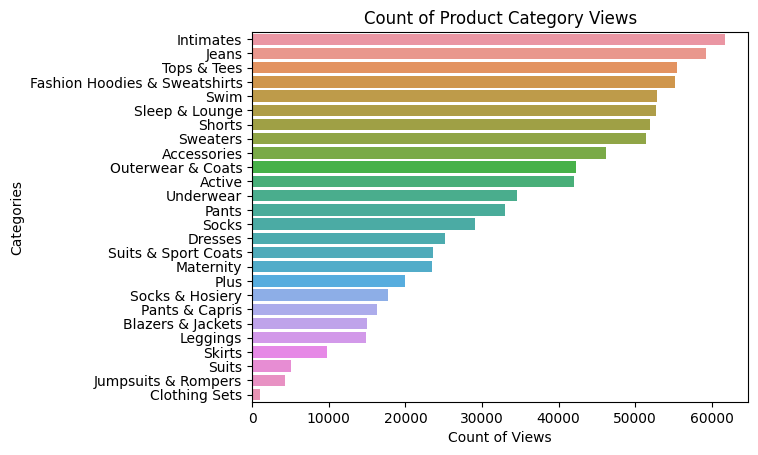

In [38]:
sns.countplot(data=views_merge, y='category', order=views_merge.category.value_counts().index).set(
    title='Count of Product Category Views', ylabel="Categories", xlabel="Count of Views")

[Text(0.5, 1.0, 'Count of Items Sold by Category'),
 Text(0, 0.5, 'Categories'),
 Text(0.5, 0, 'Count of Categories Sold')]

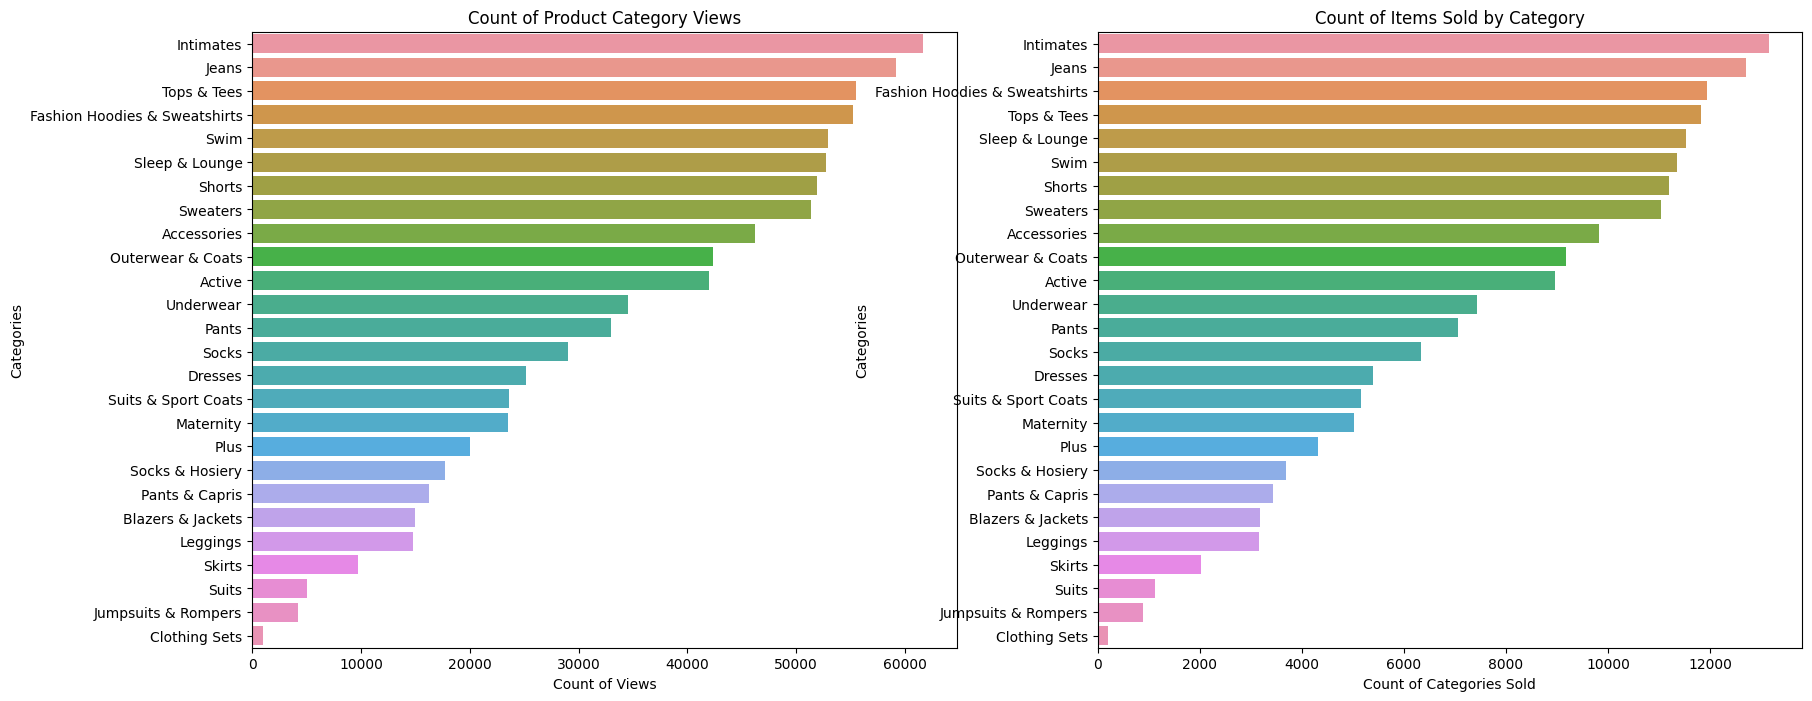

In [39]:
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
sns.countplot(data=views_merge, y='category', order=views_merge.category.value_counts().index, ax=ax1).set(
    title='Count of Product Category Views', ylabel="Categories", xlabel="Count of Views")
sns.countplot(data=order_prod, y='category', order=order_prod.category.value_counts().index, ax=ax2).set(
    title='Count of Items Sold by Category', ylabel="Categories", xlabel="Count of Categories Sold")

##Create list of 20% of products that will be cut

In [40]:
project_id = 'long-adviser-380023'

sql='''
SELECT oi.product_id as product_id, p.name as product_name, p.category as product_category, p.retail_price AS retail_price , count(*) as num_of_orders
FROM `bigquery-public-data.thelook_ecommerce.products` as p 
JOIN `bigquery-public-data.thelook_ecommerce.order_items` as oi
ON p.id = oi.product_id
GROUP BY 1,2,3,4
ORDER BY num_of_orders ASC, retail_price ASC
LIMIT 5824
'''

cut_products = pd.io.gbq.read_gbq(sql,project_id=project_id)

In [47]:
cut_products["price_total"] = cut_products["retail_price"] * cut_products["num_of_orders"]
print("Lost sales with cut items:", cut_products["price_total"].sum())
print("Total Sales:", order_prod["retail_price"].sum())


Lost sales with cut items: 735945.8310117722
Total Sales: 10795619.061520945


Looking at the product distribution of categories in relation to sales and views, I decided it would be best simply to eliminate the products we sell the least of. This list is furthermore sorted by retail price to make sure that we do not cut high value items. Essentially, based on the assumption of no refunds for returns, they would lose \$736,000 but still have about \$10,000,000 in sales!



##Customer Categorization

Purchase and Return Count

In [54]:
sql = '''
SELECT 
  user_id,
  count(*) order_count 
FROM `bigquery-public-data.thelook_ecommerce.orders` 
where status not in ('Returned','Cancelled')
group by 1
'''

user_order_count = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='user_id')

In [57]:
sql = '''
SELECT 
  user_id,
  count(*) return_count 
FROM `bigquery-public-data.thelook_ecommerce.orders` 
where status not in ('Shipped', 'Complete', 'Processing', 'Cancelled')
group by 1
'''

user_return_count = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='user_id')

In [55]:
user_order_count.value_counts()

order_count
1              45910
2              14357
3               4245
4               1559
dtype: int64

In [58]:
user_return_count.value_counts()

return_count
1               11251
2                 601
3                  24
dtype: int64

In [59]:
user_orders = pd.get_dummies(user_order_count['order_count'],prefix='orders')

In [60]:
user_returns = pd.get_dummies(user_return_count['return_count'],prefix='returns')

Order History

In [63]:
sql = '''
SELECT
  user_id,
  p.category,
  COUNT(*) purchase_count
FROM
  `bigquery-public-data.thelook_ecommerce.order_items` oi
JOIN
  `bigquery-public-data.thelook_ecommerce.products` p
ON
  oi.product_id = p.id
WHERE
  status NOT IN ('Returned','Cancelled', "Processing","Shipped")
GROUP BY 1,2
'''

user_products_cat = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='user_id')

Return History

In [64]:
sql = '''
SELECT
  user_id,
  p.category,
  COUNT(*) return_count
FROM
  `bigquery-public-data.thelook_ecommerce.order_items` oi
JOIN
  `bigquery-public-data.thelook_ecommerce.products` p
ON
  oi.product_id = p.id
WHERE
  status NOT IN ("Shipped", "Complete", "Processing", 'Cancelled')
GROUP BY 1,2
'''

user_return_cat = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='user_id')

In [65]:
user_categories = pd.get_dummies(user_products_cat['category'],prefix='cat').groupby('user_id').max()
return_categories = pd.get_dummies(user_return_cat['category'],prefix='return_cat').groupby('user_id').max()

Demographics

In [66]:
sql = '''
SELECT
  *
FROM
  `bigquery-public-data.thelook_ecommerce.users`
'''

user_demo = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='id')

In [67]:
user_country = pd.get_dummies(user_demo['country'],prefix='country')
user_gender = pd.get_dummies(user_demo['gender'],prefix='sex')
user_age = pd.get_dummies(pd.qcut(user_demo['age'], q = 7, labels = range(7)),prefix='age')
user_traffic = pd.get_dummies(user_demo['traffic_source'],prefix='traffic')

Web traffic

In [68]:
sql = '''
SELECT
  user_id,
  SUM(CASE WHEN event_type = 'purchase' THEN 1 ELSE 0 END) num_purchase,
  SUM(CASE WHEN event_type = 'cart' THEN 1 ELSE 0 END) num_cart,
  SUM(CASE WHEN event_type = 'product' THEN 1 ELSE 0 END) num_product,
  COUNT(*) all_events
FROM
  `bigquery-public-data.thelook_ecommerce.events`
WHERE
  user_id IS NOT NULL
GROUP BY
  1
'''

user_web = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='user_id')

Percentage of cart purchased

In [70]:
user_web['purchase_per_cart'] = round((user_web['num_purchase']/user_web['num_cart'])*100)


In [71]:
user_purchase_per_cart = pd.get_dummies(pd.qcut(user_web['purchase_per_cart'],q=4,labels=range(2),duplicates='drop'),prefix='purchase_per_cart')

Combine Data

In [73]:
dfs = [user_orders,
       user_returns,
       user_categories,
       return_categories,
       user_country,
       user_gender,
       user_age,
       user_traffic,
       user_purchase_per_cart]
for df in dfs:
  print(df.shape)

(66071, 4)
(11876, 3)
(27440, 26)
(11876, 26)
(100000, 15)
(100000, 2)
(100000, 7)
(100000, 5)
(79781, 2)


In [74]:
user_all = user_country.join(user_categories,how='left').\
join(return_categories,how='left').\
join(user_orders,how='left').\
join(user_returns,how='left').\
join(user_gender).join(user_age).join(user_traffic).\
join(user_purchase_per_cart,how='left')


In [77]:
user_all.mean()
user_all.dropna(inplace=True)
user_all.shape

(2137, 90)

Cluster Analysis

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

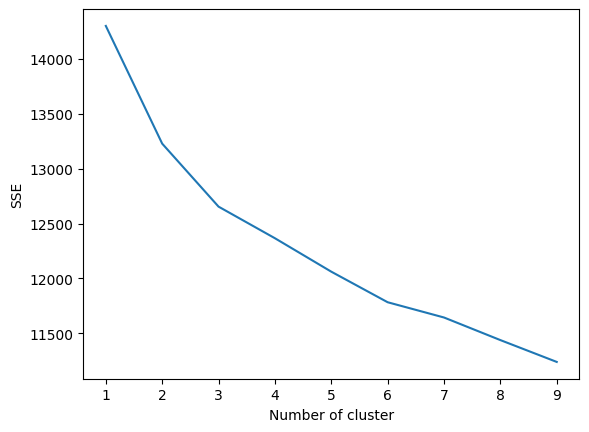

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(5)
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_all)
    #user_all["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [85]:
import numpy as np

np.random.seed(5)
kmeans = KMeans(n_clusters=4, max_iter=1000).fit(user_all)
user_all["clusters"] = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Characteristics

In [86]:
cluster_means = user_all.groupby('clusters').mean()
percent_diff = cluster_means/user_all.mean()-1

percent_diff = percent_diff.T

In [87]:
print(percent_diff.to_string())

clusters                                         0         1         2         3
age_0                                     0.053193  0.006412 -0.084805  0.005940
age_1                                     0.272210 -0.126210  0.225204 -0.102832
age_2                                    -0.000935 -0.013462  0.047711 -0.007617
age_3                                    -0.241968  0.064232 -0.120938  0.099376
age_4                                     0.142978 -0.017853 -0.074534 -0.016640
age_5                                    -0.102289  0.021533 -0.256887  0.129554
age_6                                    -0.195241  0.084784  0.302382 -0.108307
cat_Accessories                          -0.091949  0.174203 -0.134018 -0.051351
cat_Active                               -0.062499  0.108376 -0.105933 -0.020584
cat_Blazers & Jackets                    -0.446946  0.258674 -0.172988  0.046803
cat_Clothing Sets                         1.477681  0.281559 -1.000000 -0.467082
cat_Dresses                 

Rename Clusters

In [ ]:
cluster_names = {0:'Young(er) Ladies who order clothing sets as their only purchase',
                 1:'Potentially Polish Females who tend to return the most items',
                 2:'Window Shopping Males who purhcase coats in Japan',
                 3:'Males Retruning Multiple Clothing Sets and Buying Socks '
                 }

I decided to find the percentage of the cart that individuals bought as well as the number of returns per customer. Those that are buying lots of items and returning them might be flagged in our sytem. We might want to reach out and see why they are returning those items. Similarly, if they have a lot of items in their cart, but few purchases we may want to trigger a coupon that sends when the cart reaches a certain capacity. 